# Exploratory Data Analysis (EDA)


# Step 1 
*Importar las bibliotecas necesarias*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl as op

ModuleNotFoundError: No module named 'pandas'

# Step 2
*la función para leer el archivo .CSV*

In [3]:
df = pd.read_excel('bank_churn.xlsx')
df.sample(5)  #mostrar las muestras de los datos

clientnum     attrition_flag  customer_age gender  dependent_count  \
5679  788756133  Existing Customer            44      F                3   
6455  739317558  Existing Customer            48      M                5   
4427  816864483  Existing Customer            39      F                4   
5919  711430908  Attrited Customer            45      F                4   
687   708938508  Existing Customer            63      M                1   

     education_level marital_status income_category card_category  \
5679         Unknown       Divorced  Less than $40K          Blue   
6455        Graduate        Married    $80K - $120K          Blue   
4427      Uneducated         Single     $40K - $60K          Blue   
5919        Graduate        Married  Less than $40K          Blue   
687      High School        Married     $40K - $60K          Blue   

      months_on_book  ...  months_inactive_12_mon  contacts_count_12_mon  \
5679              24  ...                       1                      2   
6455              35  ...                       3                      3   
4427              34  ...                       2                      2   
5919              34  ...                       2                      1   
687               36  ...                       3                      2   

      credit_limit  total_revolving_bal  avg_open_to_buy  \
5679        2617.0                 1508           1109.0   
6455        9030.0                 2369           6661.0   
4427       10264.0                  803           9461.0   
5919        1438.3                    0           1438.3   
687         4559.0                 1571           2988.0   

      total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
5679                 1.393             4400              60   
6455                 0.662             4899              84   
4427                 0.802             4003              74   
5919                 0.685             2153              35   
687                  1.441             1870              35   

      total_ct_chng_q4_q1  avg_utilization_ratio  
5679                0.818                  0.576  
6455                0.867                  0.262  
4427                0.721                  0.078  
5919                0.346                  0.000  
687                 0.842                  0.345  

[5 rows x 21 columns]

# Step 3
*Comprobaremos los tipos de datos de cada columna*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

# Step 4
*Convertir los tipos de datos de cada columna*

In [5]:
#Convertir...
df['clientnum'] = df['clientnum'].astype(int)
#df['attrition_flag'] = df['attrition_flag'].map({'Existing Customer': False, 'Attrited Customer': True}).astype(bool)
df['attrition_flag'] = df['attrition_flag'].astype('category')
df['customer_age'] = df['customer_age'].astype(int)
df['gender'] = df['gender'].astype('category')
df['dependent_count'] = df['dependent_count'].astype(int)
df['education_level'] = df['education_level'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['income_category'] = df['income_category'].astype('category')
df['card_category'] = df['card_category'].astype('category')
df['months_on_book'] = df['months_on_book'].astype(int)
df['total_relationship_count'] = df['total_relationship_count'].astype(int)
df['months_inactive_12_mon'] = df['months_inactive_12_mon'].astype(int)
df['contacts_count_12_mon'] = df['contacts_count_12_mon'].astype(int)
df['credit_limit'] = df['credit_limit'].astype(int)
df['total_revolving_bal'] = df['total_revolving_bal'].astype(int)
df['avg_open_to_buy'] = df['avg_open_to_buy'].astype(int)
df['total_amt_chng_q4_q1'] = df['total_amt_chng_q4_q1'].astype(float)
df['total_trans_amt'] = df['total_trans_amt'].astype(int)
df['total_trans_ct'] = df['total_trans_ct'].astype(int)
df['total_ct_chng_q4_q1'] = df['total_ct_chng_q4_q1'].astype(float)
df['avg_utilization_ratio'] = df['avg_utilization_ratio'].astype(float)

# Verificamos los cambios en los tipos de datos
print(df.dtypes)


clientnum                      int64
attrition_flag              category
customer_age                   int64
gender                      category
dependent_count                int64
education_level             category
marital_status              category
income_category             category
card_category               category
months_on_book                 int64
total_relationship_count       int64
months_inactive_12_mon         int64
contacts_count_12_mon          int64
credit_limit                   int64
total_revolving_bal            int64
avg_open_to_buy                int64
total_amt_chng_q4_q1         float64
total_trans_amt                int64
total_trans_ct                 int64
total_ct_chng_q4_q1          float64
avg_utilization_ratio        float64
dtype: object


# Step 5
*Agrupar categorías que no superen el mincount*

In [6]:
# "Cleaning" the data -- part 2: combining rate categories ("levels")
#def CombineRareCategories(data, mincount):
#    for col in data.columns:
#        if (type(data[col][0]) == str):
#            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
#                if ( row[0] < mincount):
#                    df[col].replace(index, 'Other', inplace = True)
#                else:
#                    None

# lets apply this functino to our data with mincount=10                    
#CombineRareCategories(df, 10)        

#df[0:10] 

# Step 6
*Convertir los tipos de datos de cada columna*

In [7]:
# Establece el número máximo de columnas a mostrar
pd.set_option('display.max_columns', 56)
print(df.isnull().sum())

clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64


In [8]:
# cuenta de valores por cada columna y sus categorías
for col in df.select_dtypes(include=['category','object','bool']).columns:
  print(col)
  print(df[col].value_counts())
  print('\n') 

attrition_flag
attrition_flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


gender
gender
F    5358
M    4769
Name: count, dtype: int64


education_level
education_level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


marital_status
marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


income_category
income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


card_category
card_category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64




# Step 8
*Duplicar el df original*

*Eliminar columna ID*

*seleccionar solo las columnas numéricas y describe*

In [9]:
df2 = df.copy()
df2 = df2.drop(columns=['clientnum'])
df_numeric = df2.select_dtypes(include=[np.number])

In [10]:
df_numeric.describe()

customer_age  dependent_count  months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       total_relationship_count  months_inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       contacts_count_12_mon  credit_limit  total_revolving_bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.938679          1162.814061   
std                 1.106225   9088.788539           814.987335   
min                 0.000000   1438.000000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       avg_open_to_buy  total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.124617              0.759941      4404.086304       64.858695   
std        9090.695763              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       total_ct_chng_q4_q1  avg_utilization_ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

#Variabilidad: las columnas varía de moderada a alta, dependiendo de la naturaleza de los datos. Columnas como Tuition, Total.School.Enrollment, y FPP muestran alta variabilidad, lo que indica una amplia dispersión en los datos.

#Valores extremos (Outliers): columnas, como Tuition, Total.School.Enrollment, y FRP.Active, donde los valores extremos se alejan significativamente del rango intercuartil.

#Posibles errores:  las columnas que contienen variables numéricas continuas como Days, Tuition, y FPP podrían tener posibles errores

#Distribución: La mayoría de las columnas presentan una distribución sesgada, donde las medianas y los percentiles 25 y 75 tienden a agruparse en rangos específicos.
Las columnas relacionadas con conteos de eventos, como Cancelled.Pax y Total.Discount.Pax, muestran distribuciones donde la mayoría de los casos están en el rango más bajo, indicando que cancelaciones y descuentos no son comunes.

# step 9
*Configuración de visualización*

*Exploración de datos categóricos*

*Exploración de datos numéricos*

*Diagrama de dispersión entre las principales variables numéricas*

In [11]:
# Configuración de visualización agrupada
sns.set(style="whitegrid")

In [12]:
# Exploración de datos categóricos
def plot_categorical(data, batch_size=16):
    categorical_columns = data.select_dtypes(include=['category', 'object']).columns
    cat_columns = len(categorical_columns)
    
    # Crear gráficos de frecuencia
    for start in range(0, cat_columns, batch_size):
        end = min(start + batch_size, cat_columns)
        current_batch = categorical_columns[start:end]
        cat_plots = len(current_batch)
        
        # Crear la figura y los ejes
        num_rows = (cat_plots + 3) // 4
        fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, num_rows * 5))
        
        # Asegurarse de que `axes` siempre sea un array bidimensional
        if num_rows == 1 and cat_plots == 1:
            axes = np.array([[axes]])
        elif num_rows == 1:
            axes = np.expand_dims(axes, axis=0)
        
        # Crear los gráficos
        for i, col in enumerate(current_batch):
            row = i // 4
            col_idx = i % 4
            ax = axes[row, col_idx]
            sns.countplot(y=col, data=data, hue=col, palette="Set2", ax=ax, legend=False)
            ax.set_title(f'Frecuencia de {col}')
        
        # Desactivar los ejes no utilizados si hay menos gráficos que subplots
        if cat_plots < num_rows * 4:
            for i in range(cat_plots, num_rows * 4):
                fig.delaxes(axes.flatten()[i])
        
        plt.tight_layout()
        plt.show()

In [13]:
# Exploración de datos numéricos
def plot_numerical(data, batch_size=16):
    numerical_columns = data.select_dtypes(include=[np.number]).columns
    num_columns = len(numerical_columns)
    
    # Crear histogramas
    for start in range(0, num_columns, batch_size):
        end = min(start + batch_size, num_columns)
        current_batch = numerical_columns[start:end]
        num_plots = len(current_batch)
        
        fig, axes = plt.subplots(nrows=(num_plots + 3) // 4, ncols=4, figsize=(20, (num_plots + 3) // 4 * 5))
        fig.tight_layout(pad=5.0)

        for i, col in enumerate(current_batch):
            row = i // 4
            col_idx = i % 4
            ax = axes[row, col_idx] if num_plots > 1 else axes
            sns.histplot(data[col], kde=True, color='blue', ax=ax)
            ax.set_title(f'Histograma de {col}')
        
        plt.tight_layout()
        plt.show()

    # Crear boxplots
    for start in range(0, num_columns, batch_size):
        end = min(start + batch_size, num_columns)
        current_batch = numerical_columns[start:end]
        num_plots = len(current_batch)
        
        fig, axes = plt.subplots(nrows=(num_plots + 3) // 4, ncols=4, figsize=(20, (num_plots + 3) // 4 * 5))
        fig.tight_layout(pad=5.0)

        for i, col in enumerate(current_batch):
            row = i // 4
            col_idx = i % 4
            ax = axes[row, col_idx] if num_plots > 1 else axes
            sns.boxplot(data[col], color='green', ax=ax)
            ax.set_title(f'Boxplot de {col}')
        
        plt.tight_layout()
        plt.show()

In [14]:
# Diagrama de dispersión entre las principales variables numéricas
def plot_scatter(data, batch_size=10):
    numerical_columns = data.select_dtypes(include=[np.number]).columns
    num_columns = len(numerical_columns)
    
    # Dividir en lotes
    for start in range(0, num_columns, batch_size):
        end = min(start + batch_size, num_columns)
        current_batch = numerical_columns[start:end]
        num_plots = len(current_batch)
        
        # Crear subplots para el lote actual
        fig, axes = plt.subplots(nrows=(num_plots * (num_plots - 1)) // 2 // batch_size + 1, ncols=batch_size, figsize=(batch_size * 5, (num_plots * (num_plots - 1)) // 2 // batch_size * 5 + 10))
        fig.tight_layout(pad=5.0)

        plot_count = 0
        for i in range(num_plots-1):
            for j in range(i+1, num_plots):
                row = plot_count // batch_size
                col = plot_count % batch_size
                ax = axes[row, col] if num_plots > 1 else axes
                sns.scatterplot(x=data[current_batch[i]], y=data[current_batch[j]], ax=ax)
                ax.set_title(f'{current_batch[i]} vs {current_batch[j]}')
                plot_count += 1

        # Ajustar layout y mostrar la figura
        plt.tight_layout()
        plt.show()

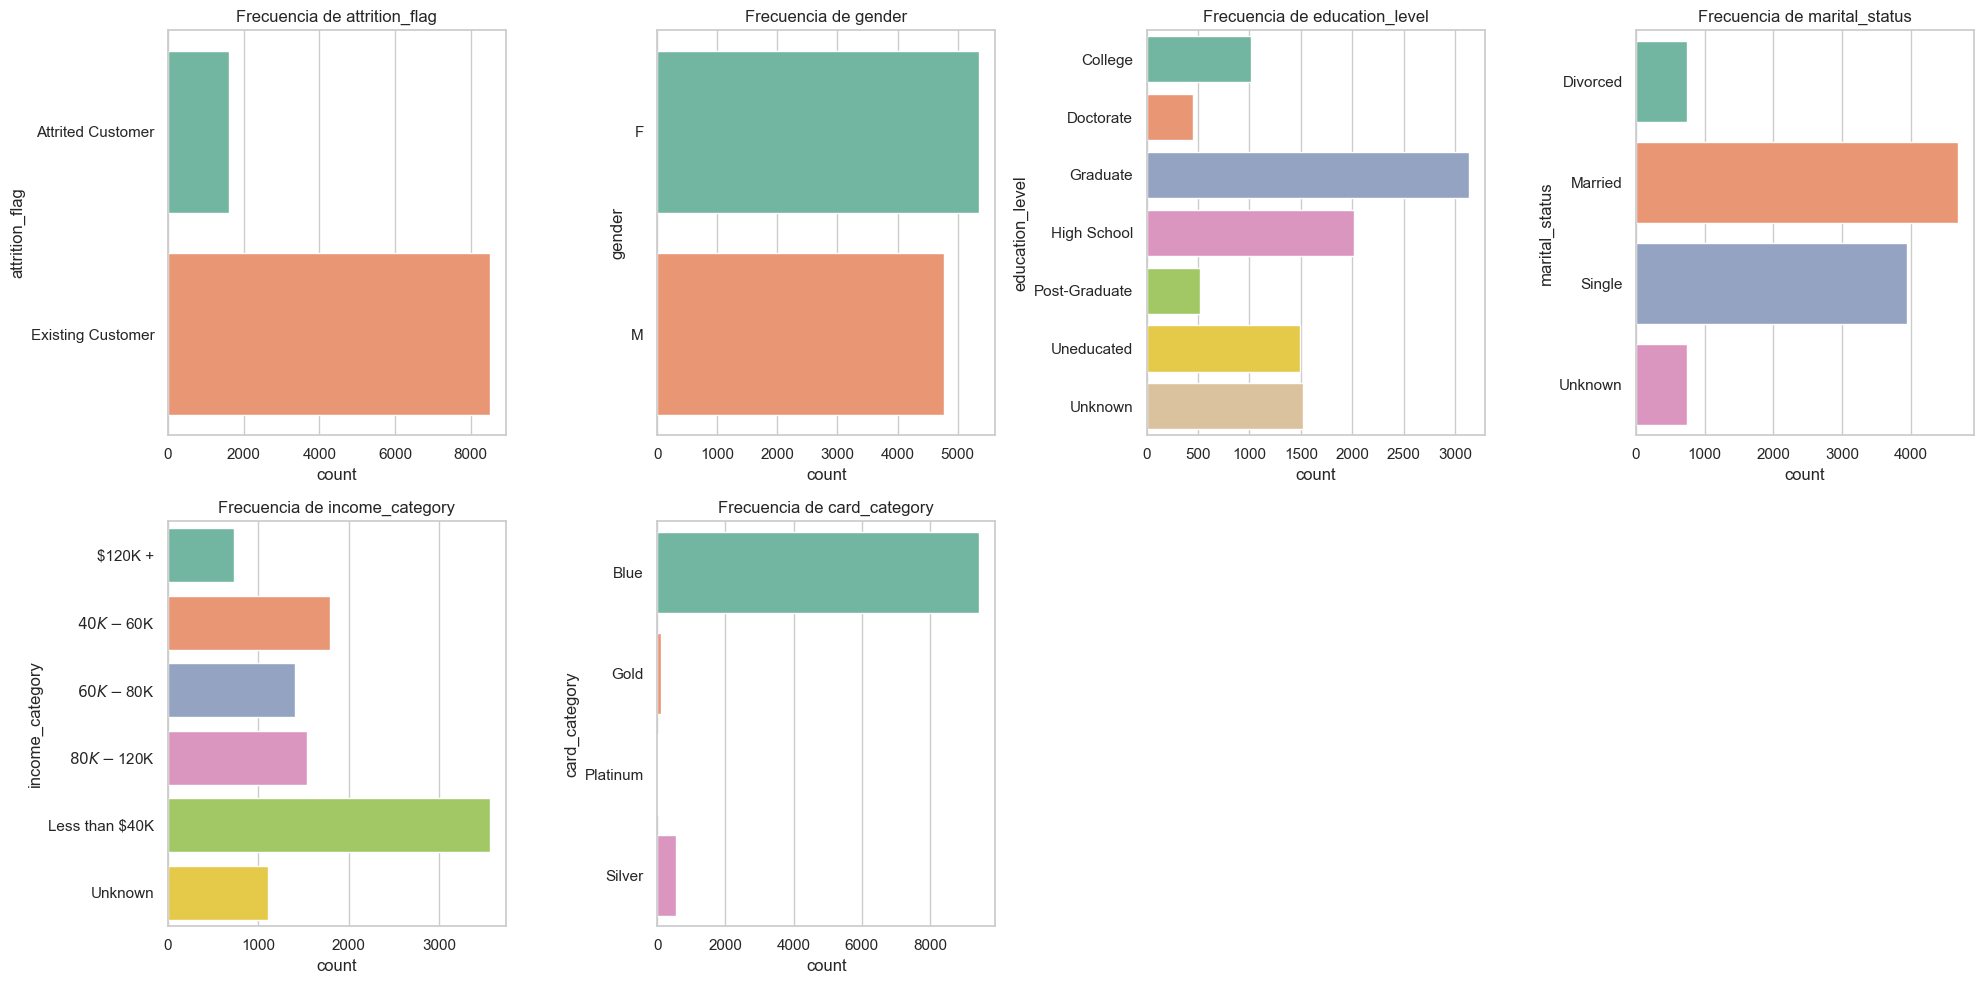

In [15]:
# Visualización de variables categóricas
plot_categorical(df)

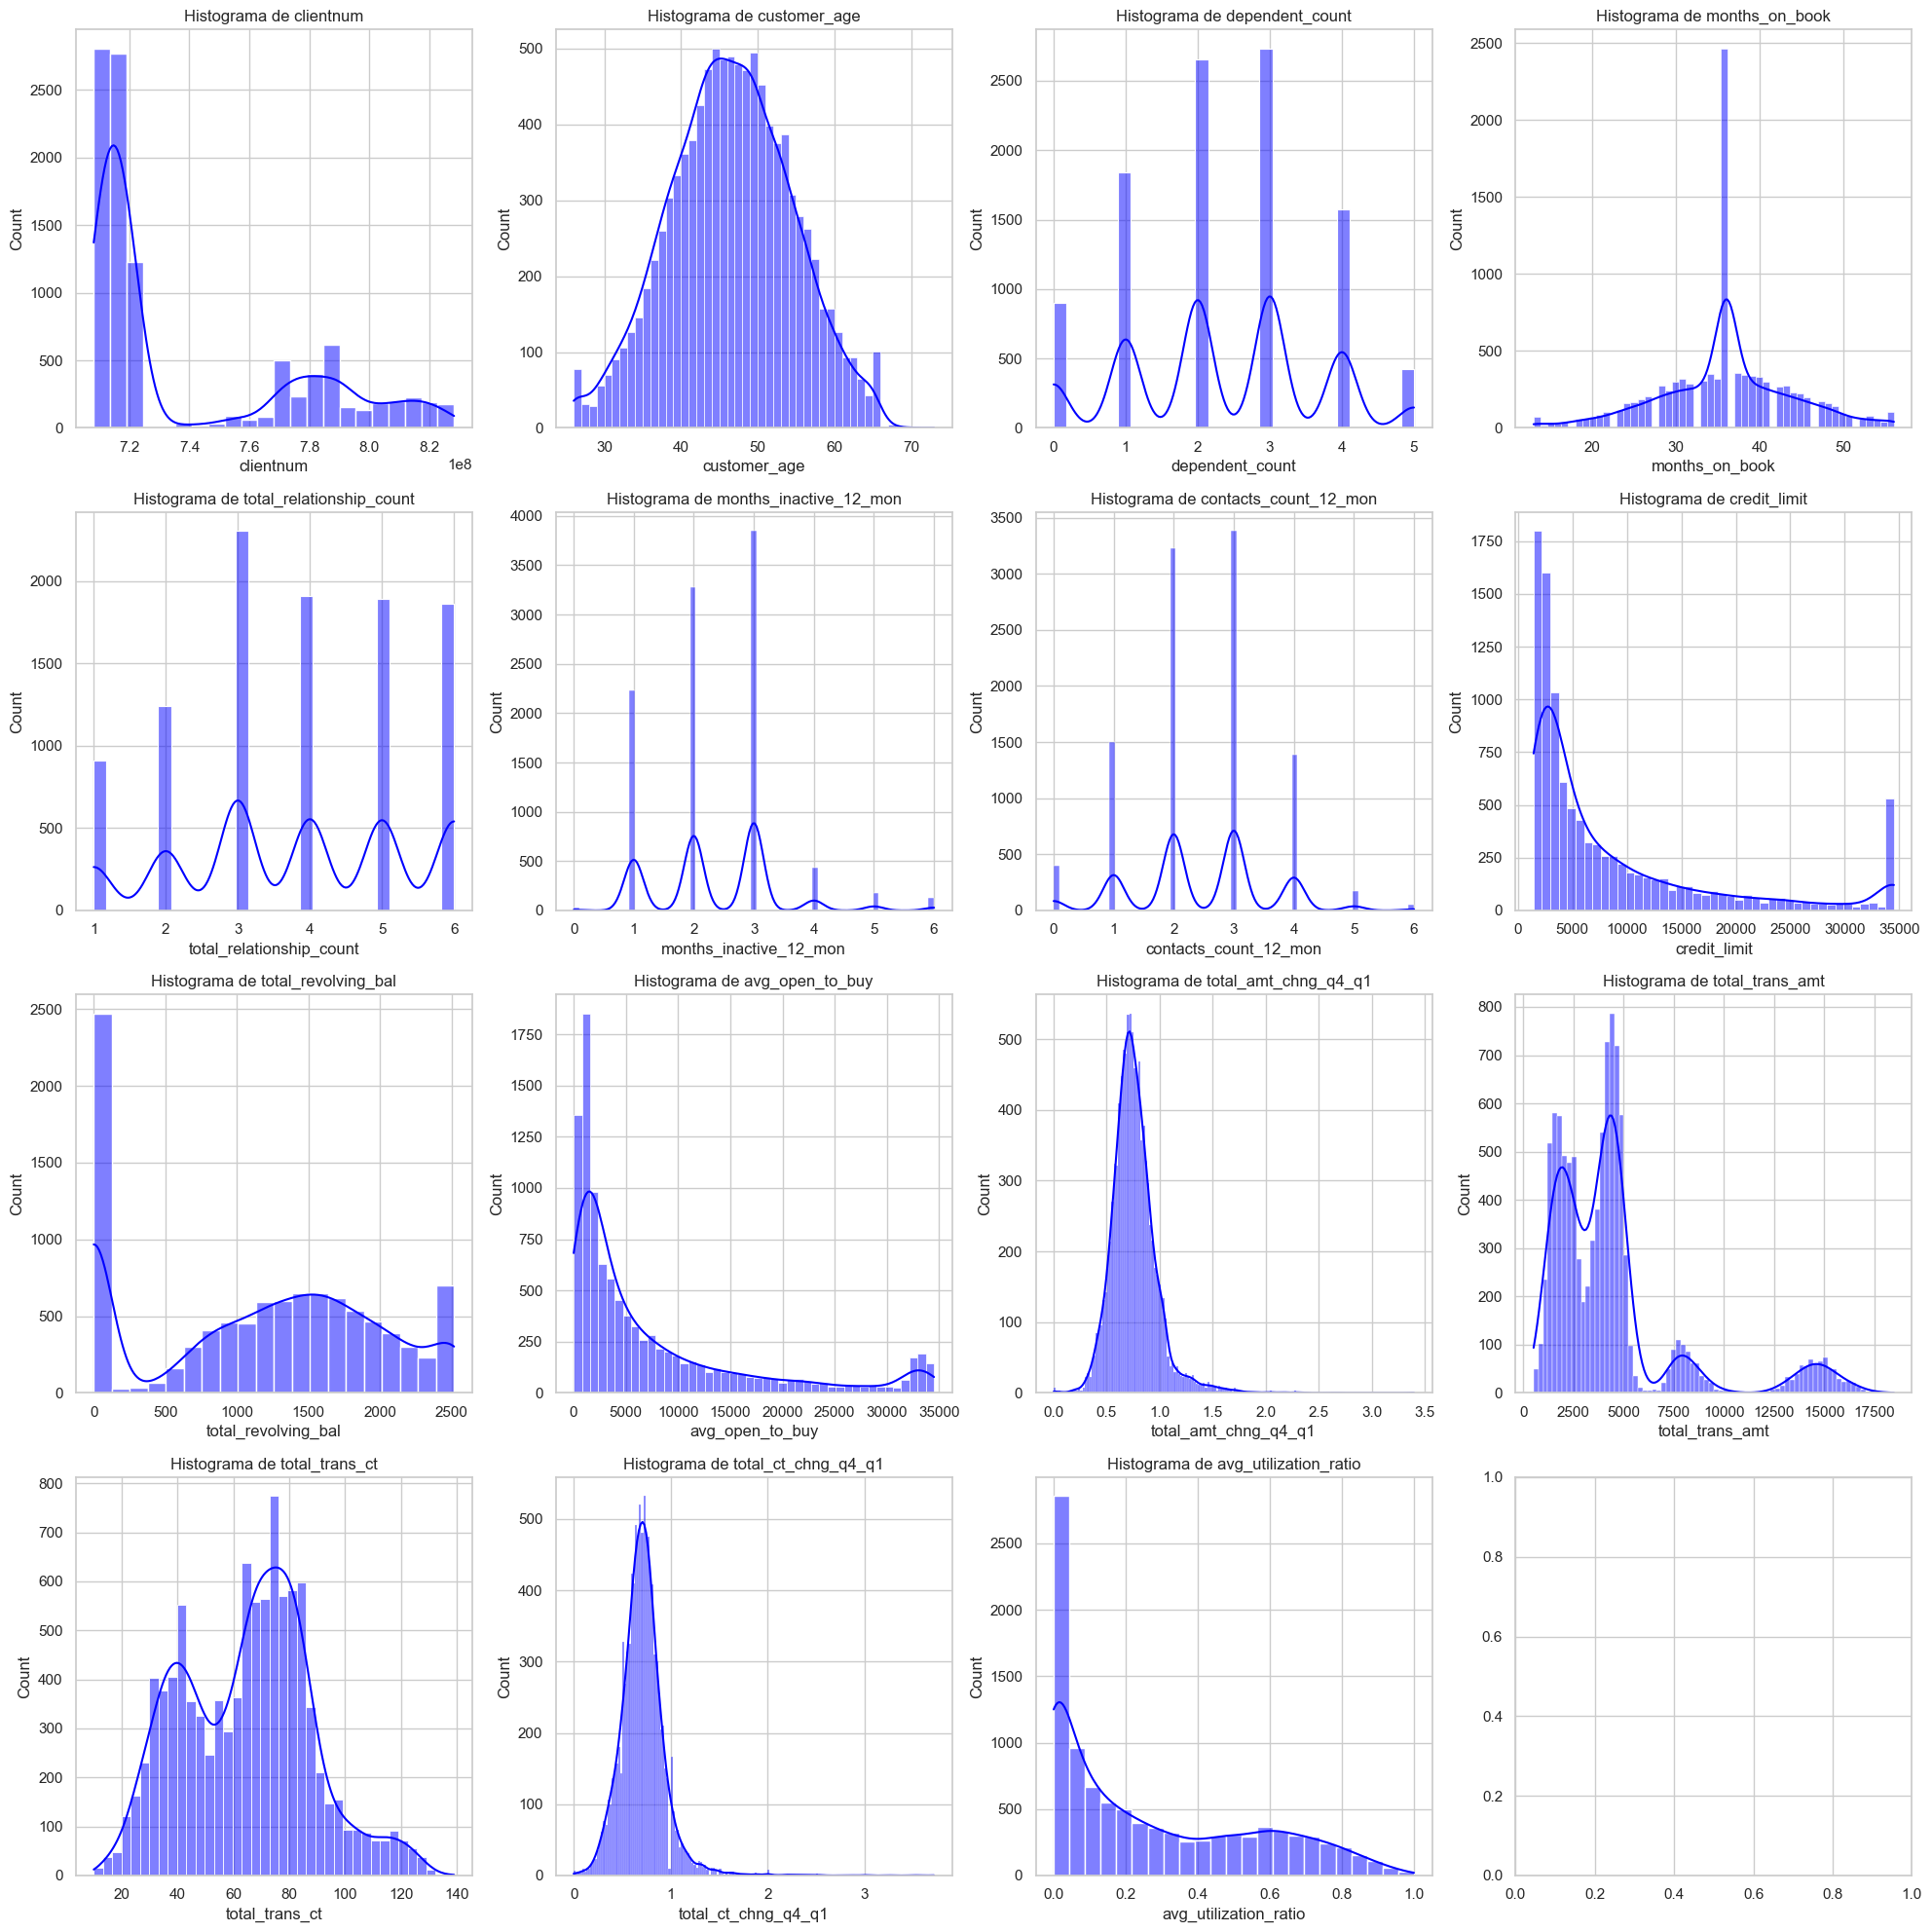

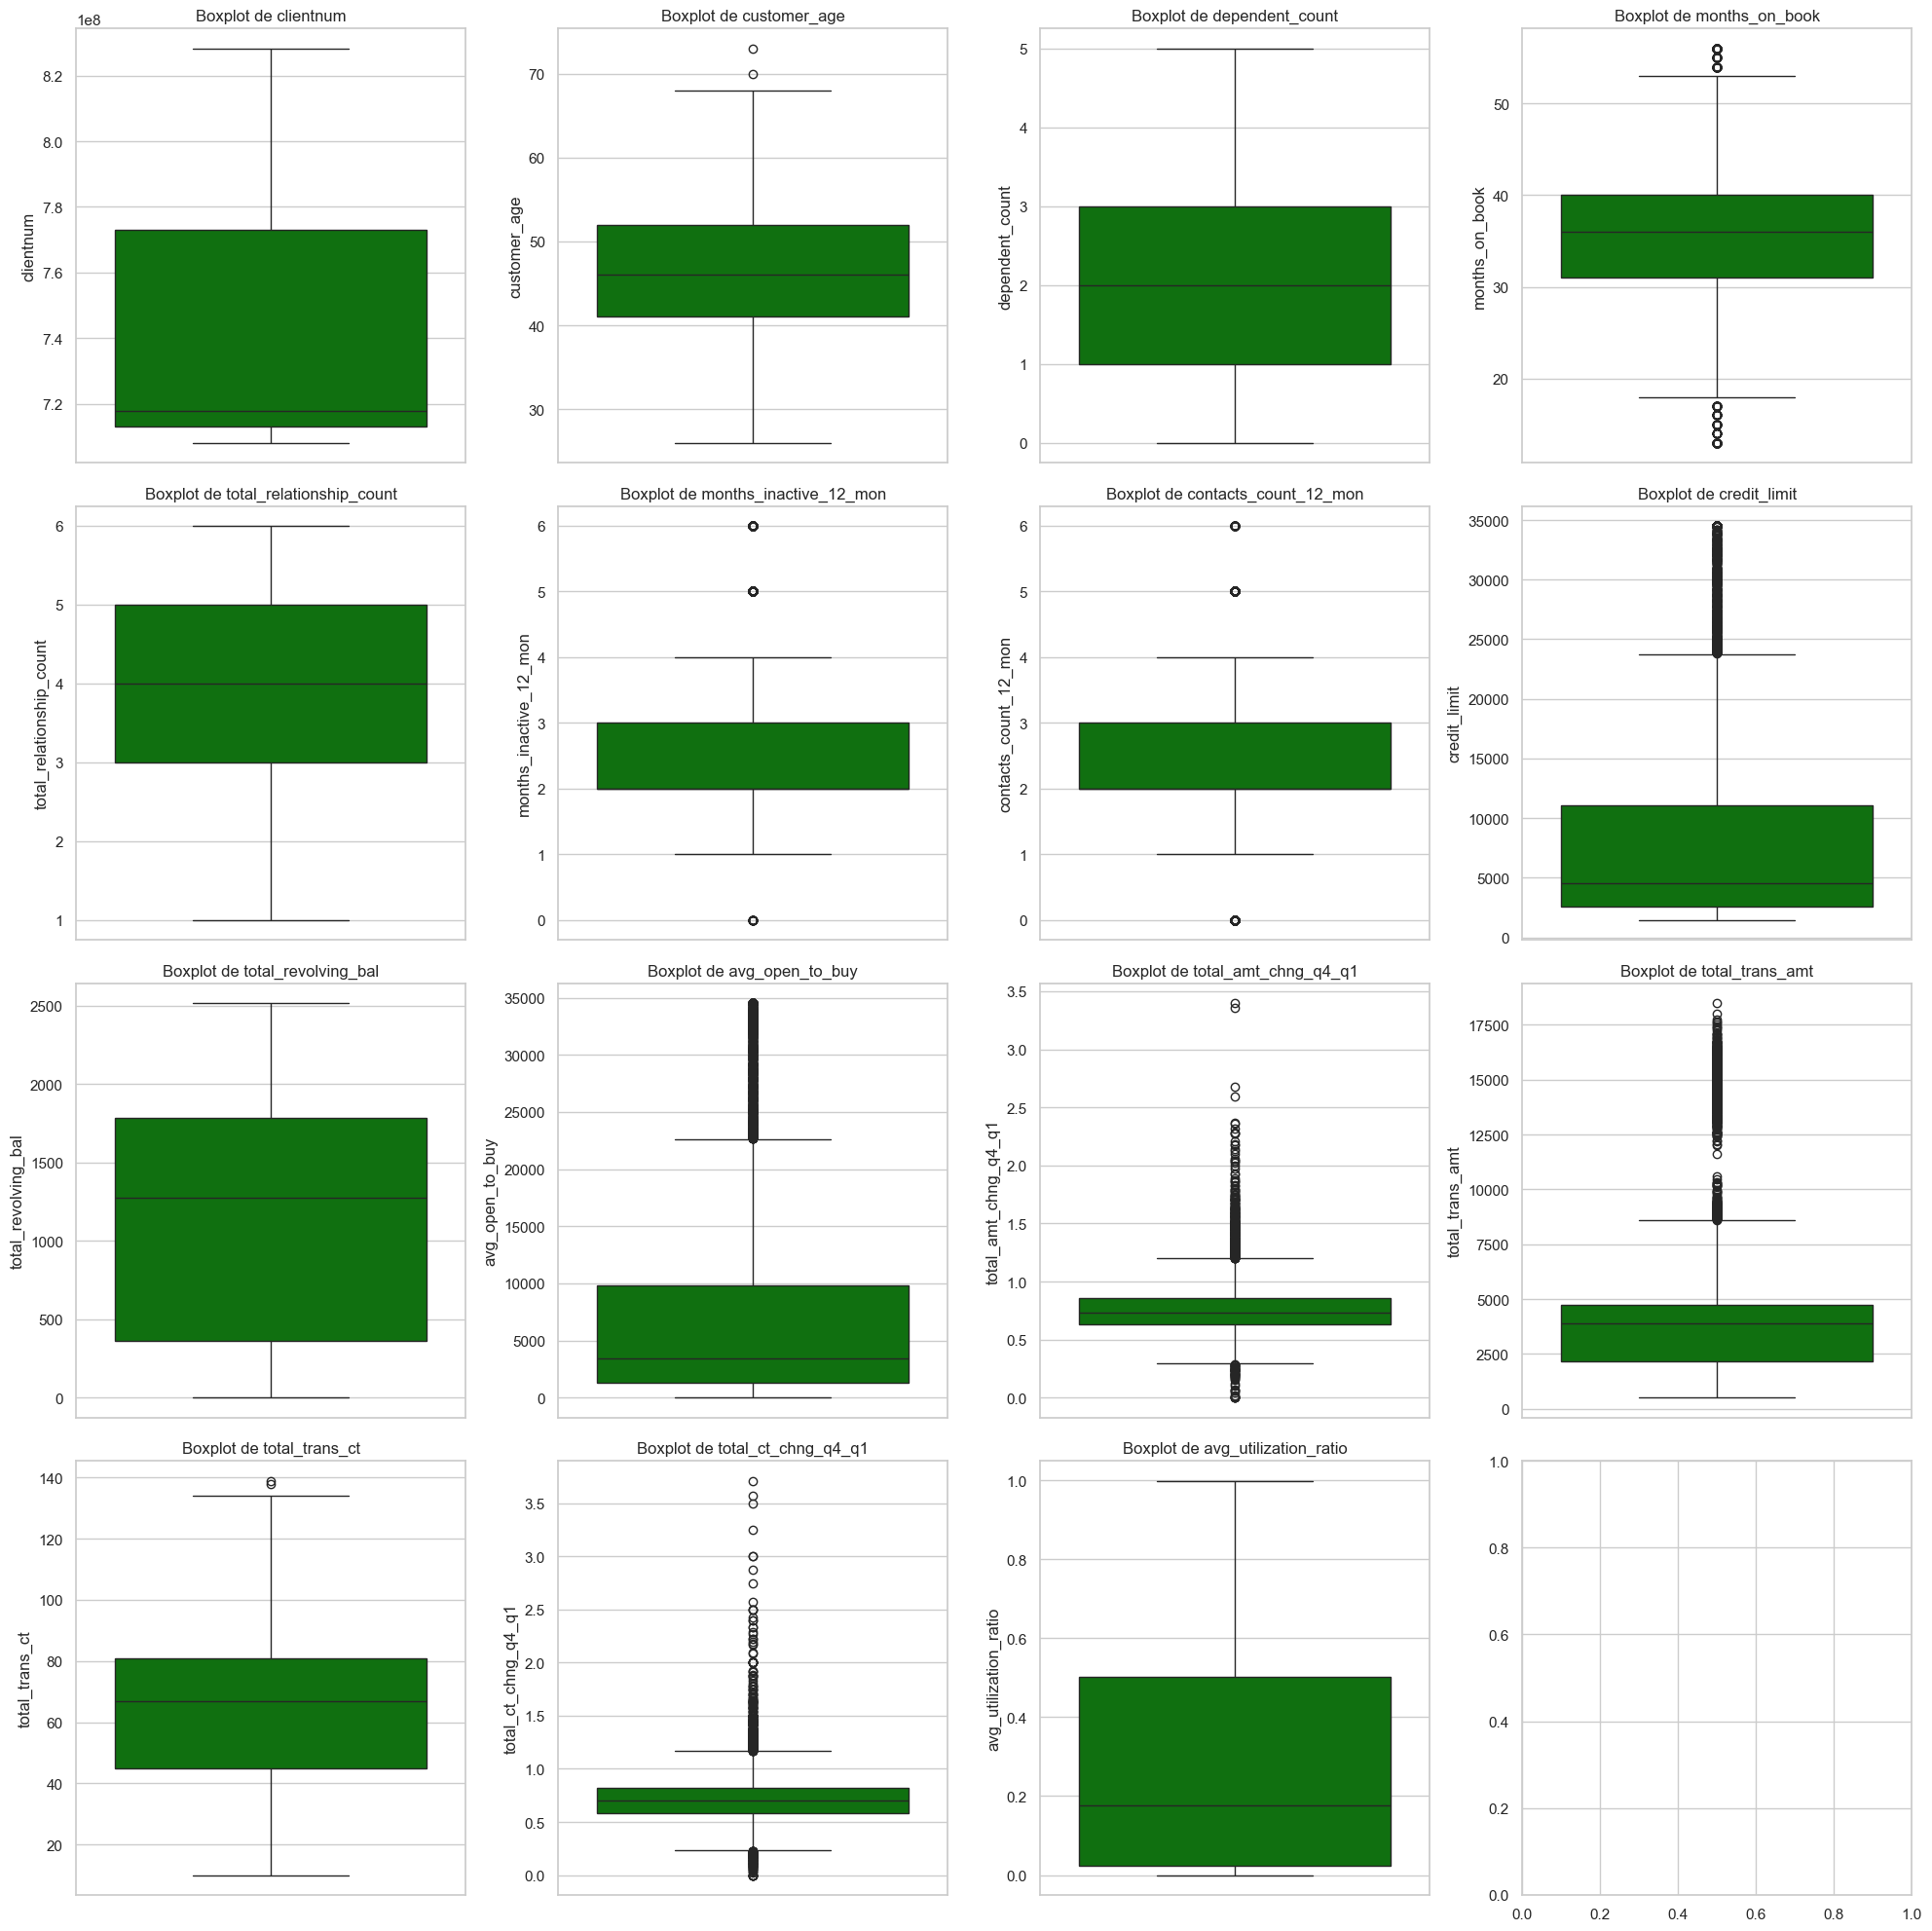

In [16]:
# Visualización de variables numéricas
plot_numerical(df)

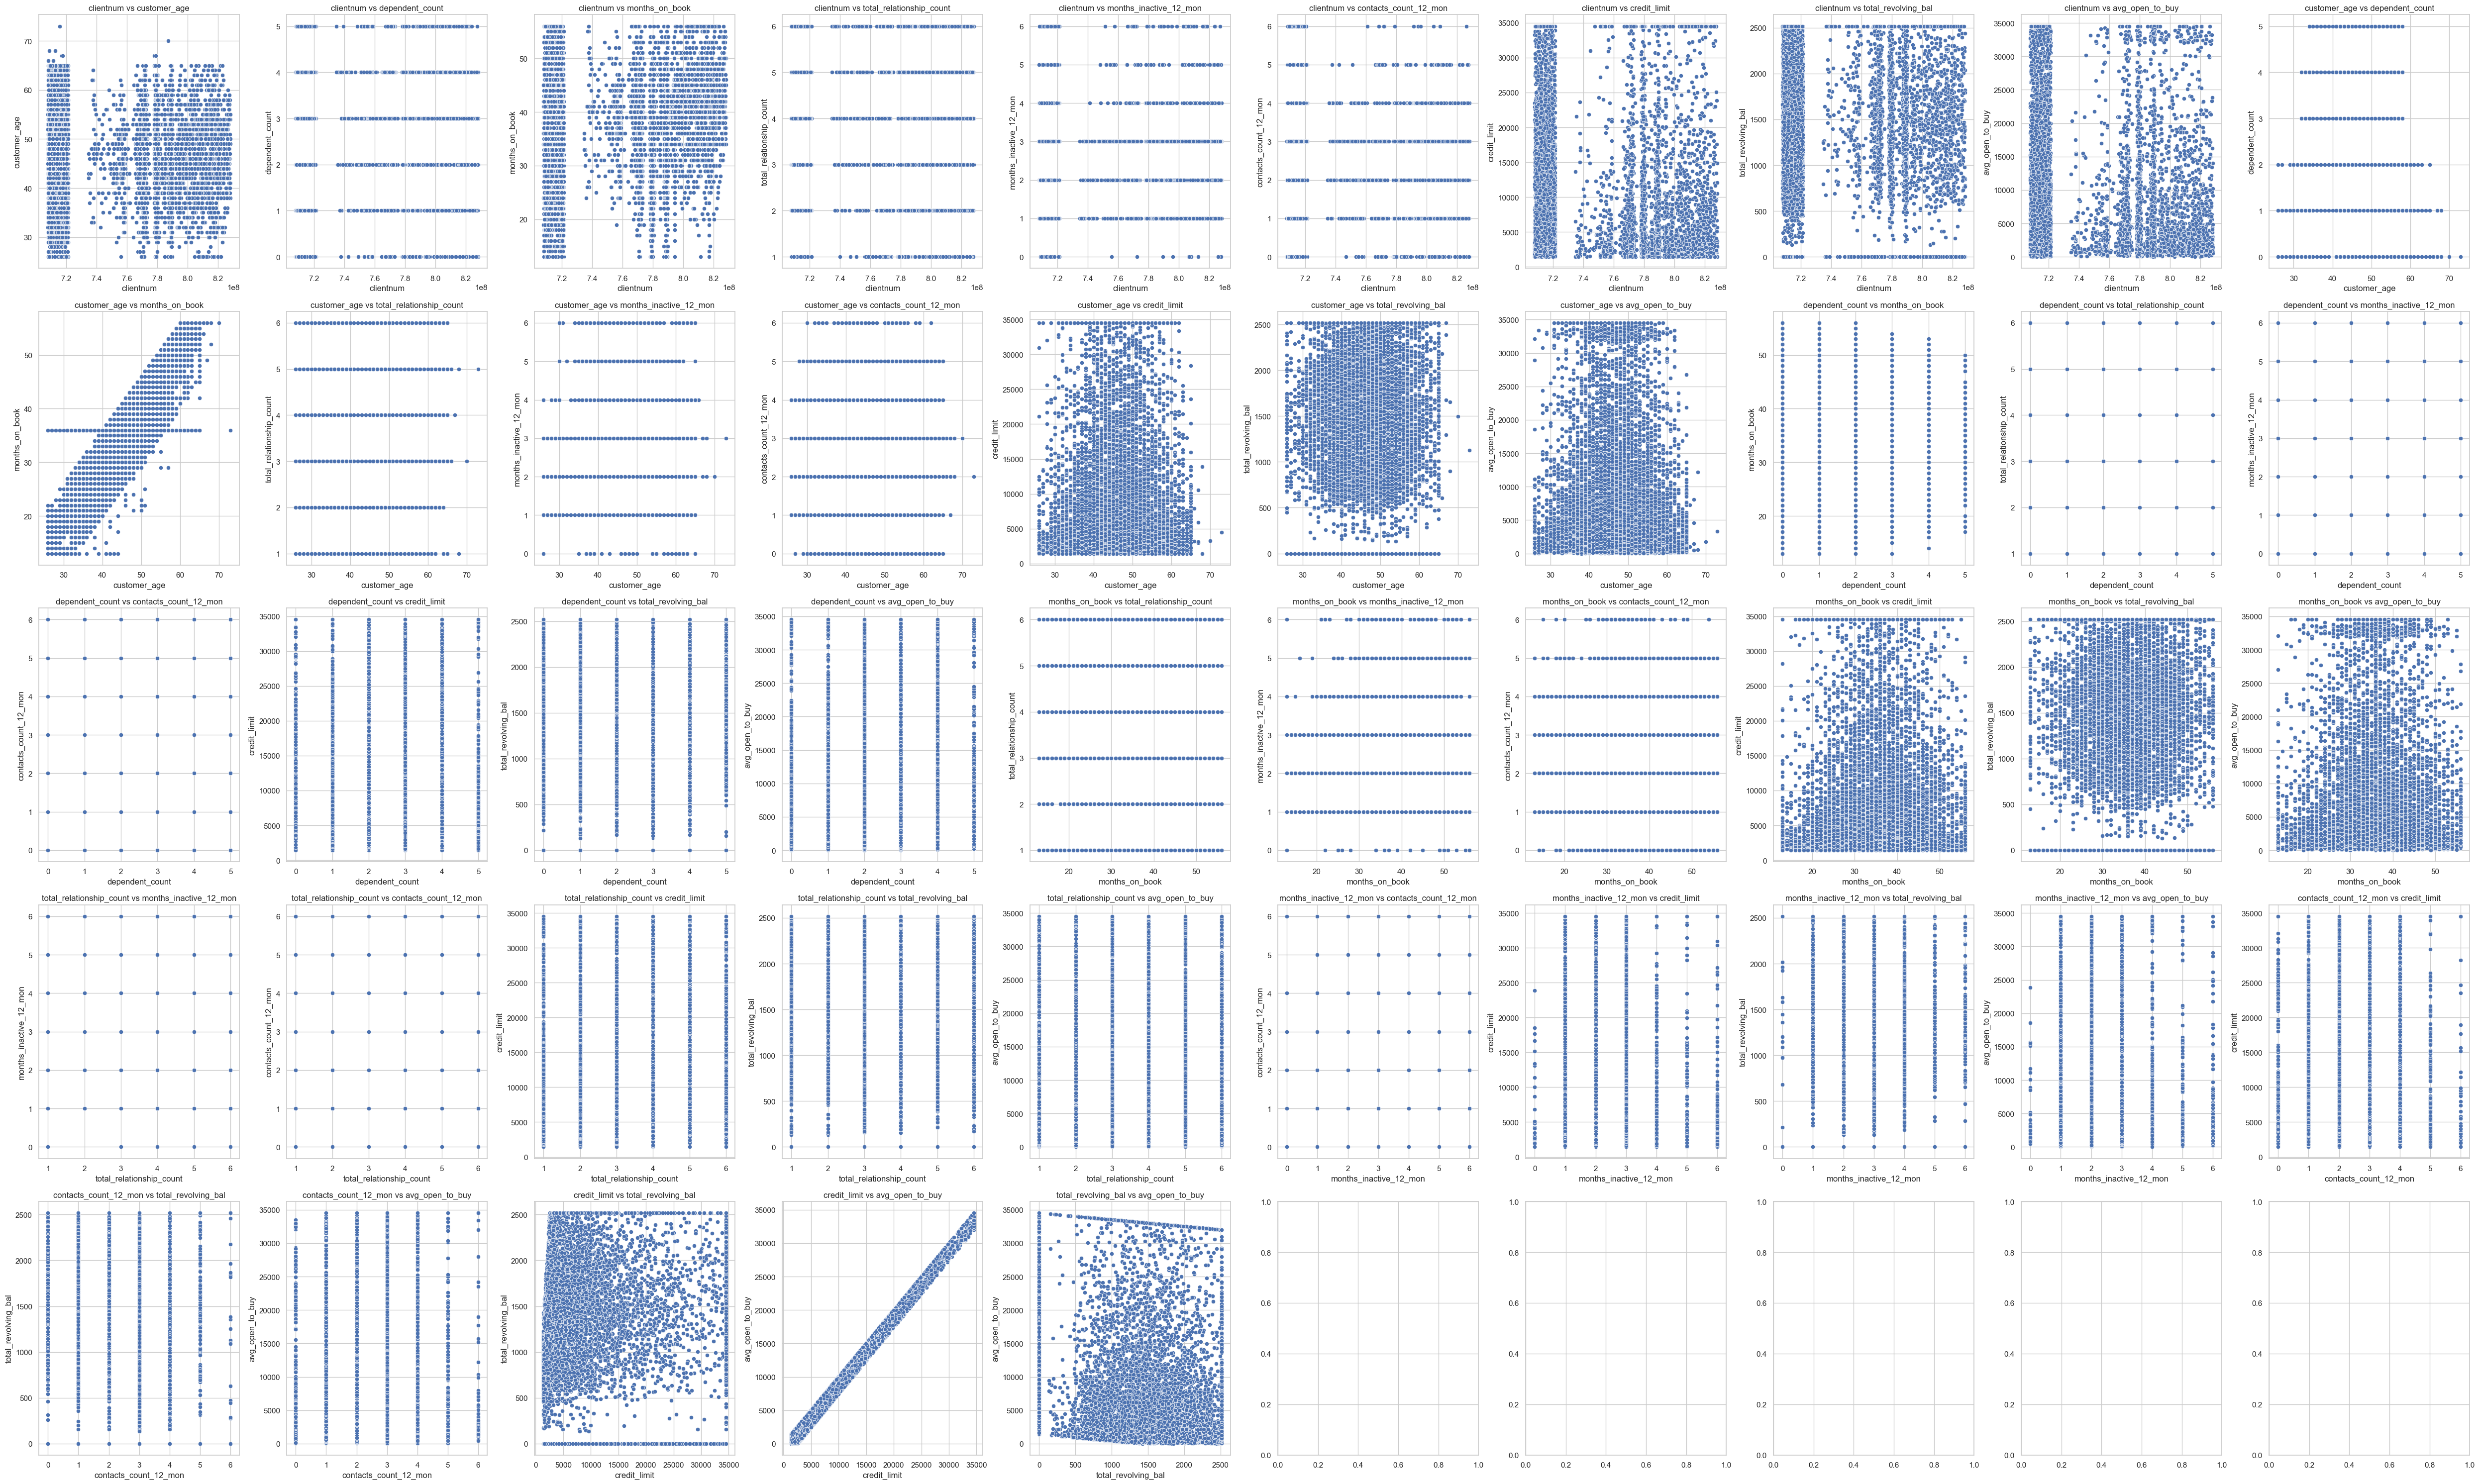

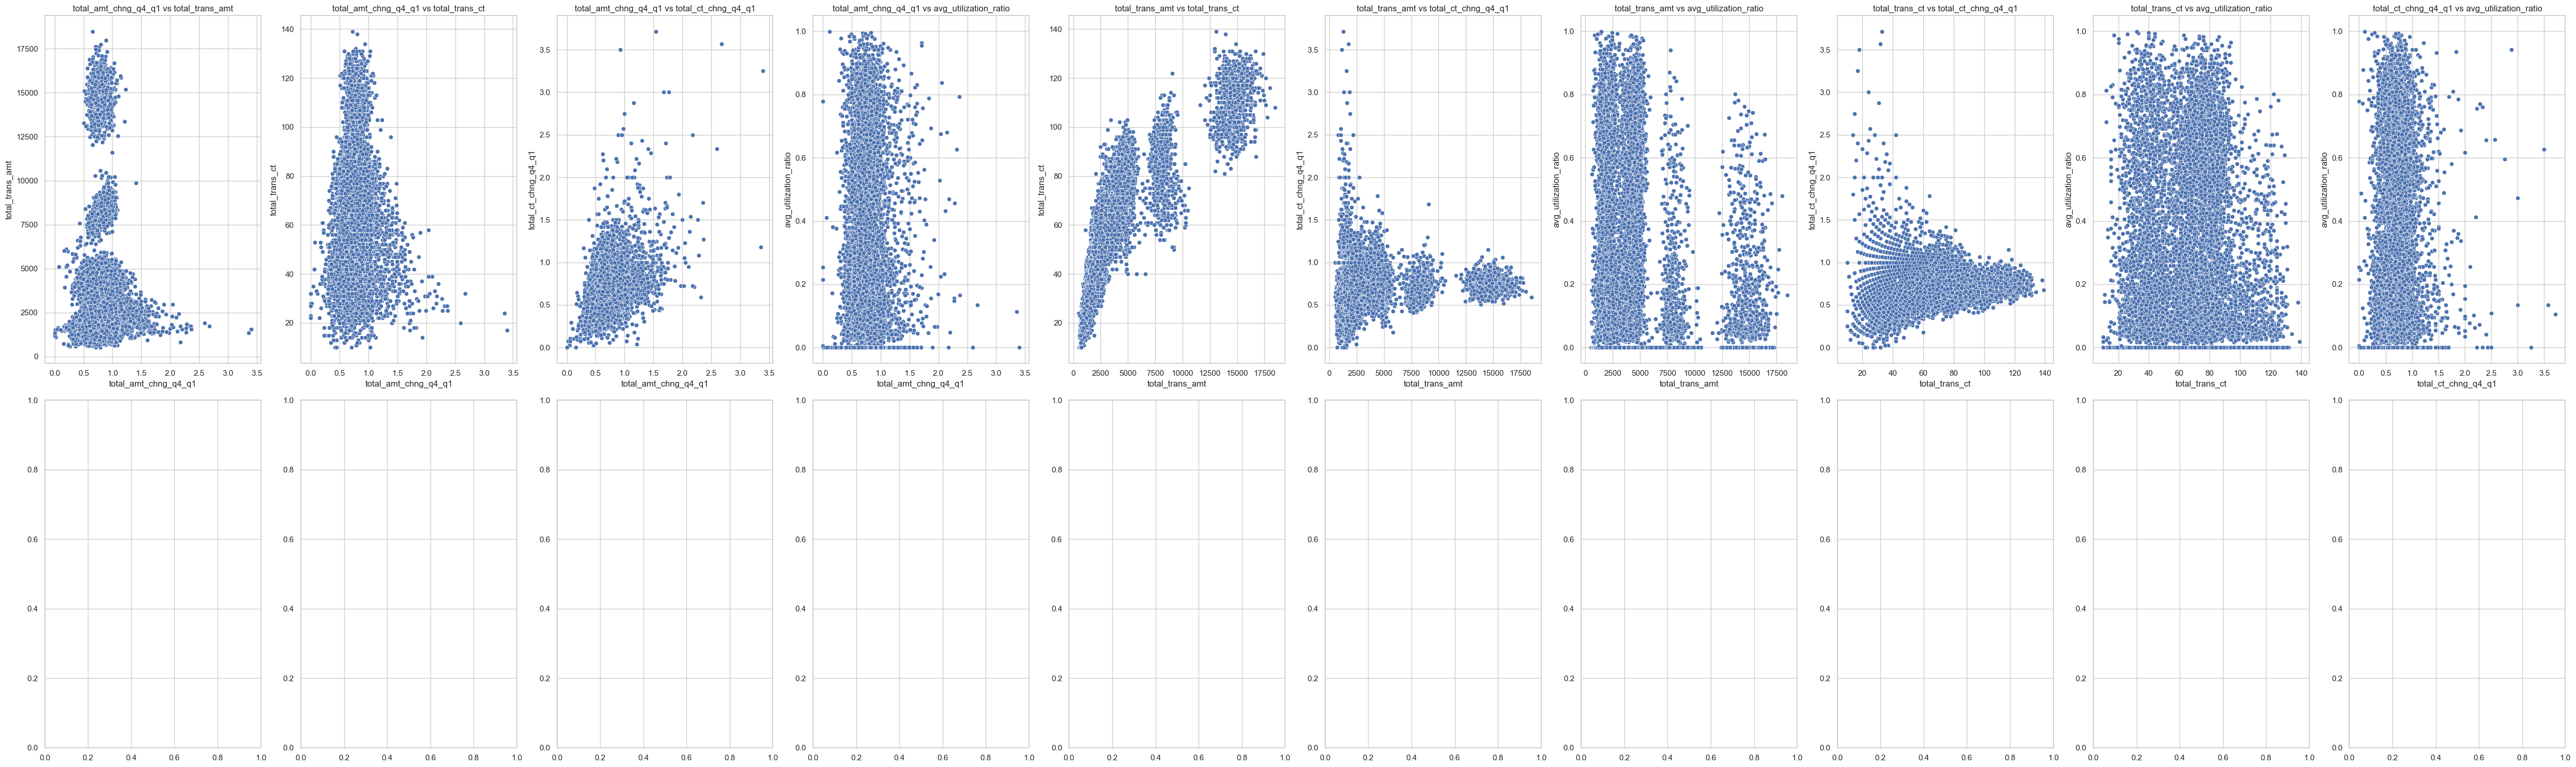

In [23]:
# Diagramas de dispersión entre variables numéricas
plot_scatter(df)

In [21]:
# Verificar nombre de las columnas en df_numeric
df2['attrition_flag'] = df2['attrition_flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df_numeric = df2.select_dtypes(include=[np.number])
print(df_numeric.columns)

Index(['attrition_flag', 'customer_age', 'dependent_count', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')


# step 10
*Matriz de correlación*


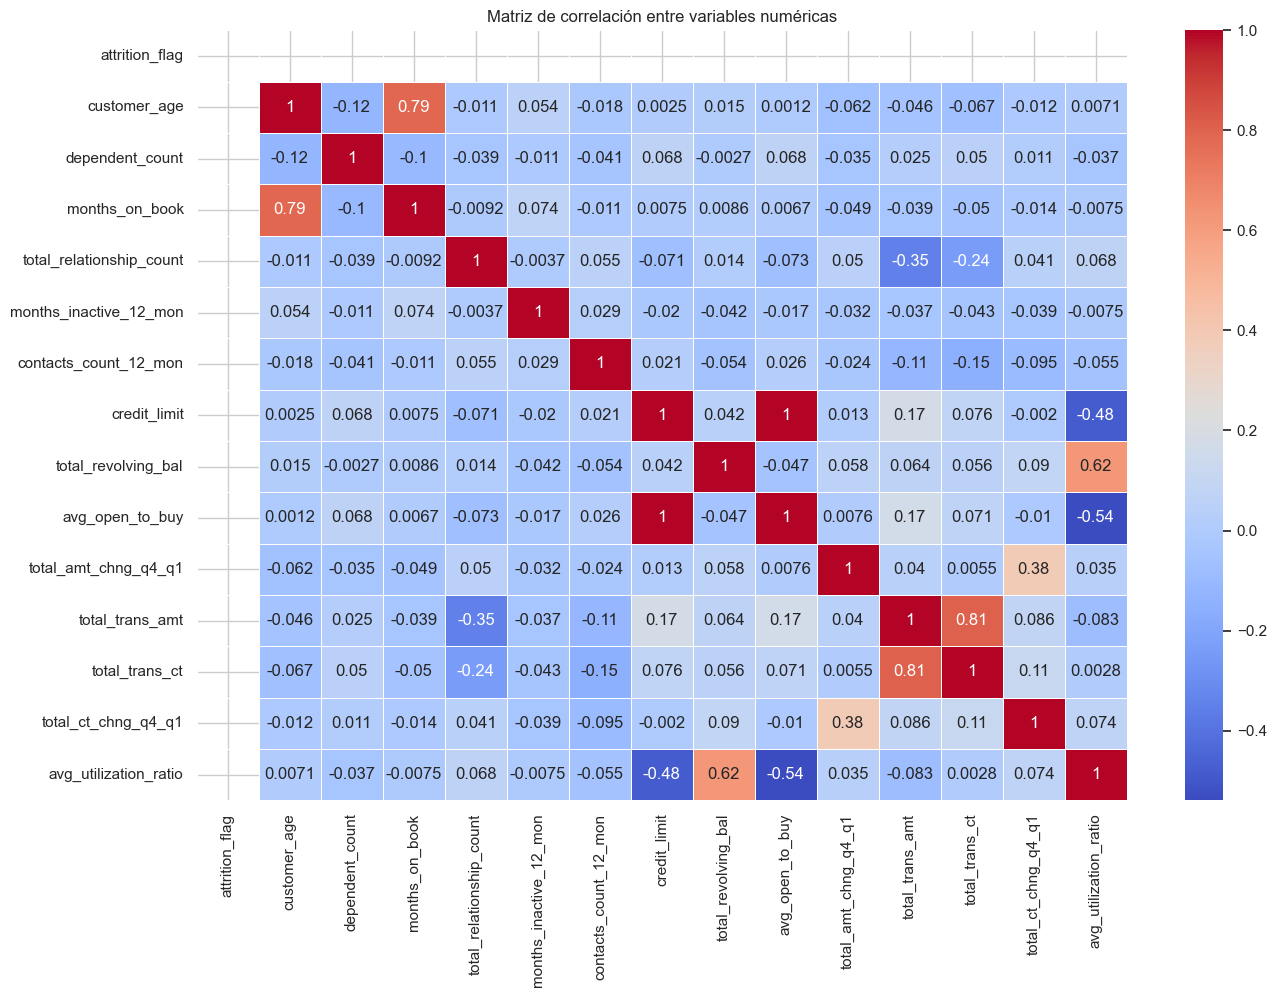

In [22]:
# Matriz de correlación de variables numéricas
corr_matrix = df_numeric.corr()

# Asegurarse de que 'Retained.in.2012.' esté en la lista de columnas
cols = [col for col in corr_matrix.columns if col != 'attrition_flag']
cols = ['attrition_flag'] + cols

# Reordenar la matriz de correlación
corr_matrix = corr_matrix[cols].loc[cols]

# Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()